#  Linear Regression

In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

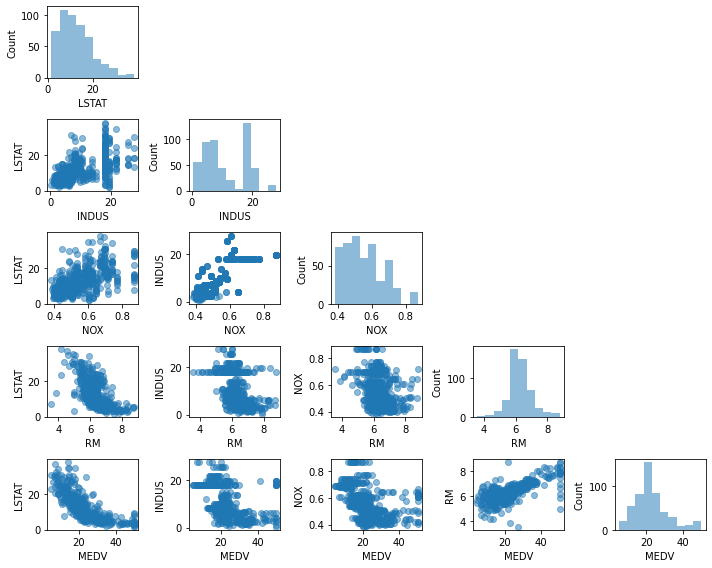

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

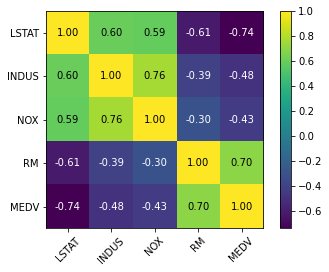

In [5]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

##  Simple regression  gradient descent

In [6]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[['RM']].values
y = df['MEDV'].values
scx=StandardScaler()
scy=StandardScaler()
Xstd=scx.fit_transform(X)
ystd=scy.fit_transform(y[: ,np.newaxis]).flatten()


In [32]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, ystd, test_size=0.33, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 1)
(167, 1)
(339,)
(167,)


In [34]:
print(y_train[:5])

[-0.86338663 -0.64571167  0.49708184 -0.2647805  -0.29743175]


In [35]:
print(y_test[:5])

[ 0.11615067  1.07392047 -0.97222411  0.02908069 -0.70013041]


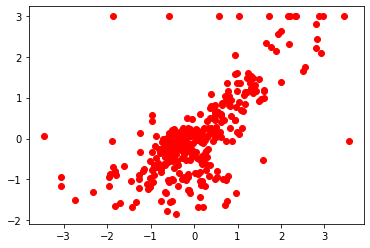

In [128]:
plt.plot(X_train,y_train,'ro')

In [36]:
lr = LinearRegressionGD()
lr.fit(X_train, y_train)

In [37]:
print("intercept:",lr.w_[0])
print("slope:",lr.w_[1])

intercept: 0.005759247666098826
slope: 0.6904223036659405


In [40]:
#prediction
from sklearn.metrics import accuracy_score , mean_squared_error
ytrue=y_train
ypred = lr.predict(X_train)
print('Mean Squared Error:',mean_squared_error(ytrue,ypred))

Mean Squared Error: 0.5428721217057697


# multi linear regression

In [41]:
from sklearn.model_selection import train_test_split
X = df[['RM','LSTAT','INDUS','NOX']].values
y = df['MEDV'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, ystd, test_size=0.33, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 1)
(167, 1)
(339,)
(167,)


In [49]:
lr = LinearRegressionGD()
lr.fit(X_train, y_train)

In [50]:
print("intercept:",lr.w_[0])
print("slope:",lr.w_[1])

intercept: 0.005759247666098826
slope: 0.6904223036659405


In [51]:
#prediction
from sklearn.metrics import accuracy_score , mean_squared_error
ytrue=y_train
ypred = lr.predict(X_train)
print('Mean Squared Error:',mean_squared_error(ytrue,ypred))

Mean Squared Error: 0.5428721217057697


# polynomial regression

In [22]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [23]:
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegressionGD()
pr = LinearRegressionGD()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

<ipython-input-6-93e68d1ecf09>:16: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0


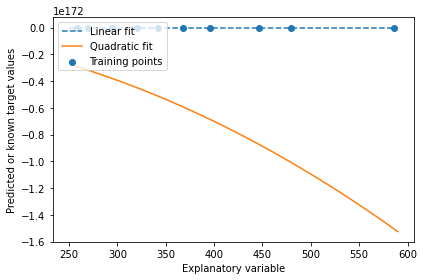

In [24]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [53]:
print(y_quad_pred)

[-2.91585289e+171 -3.19340176e+171 -3.78634694e+171 -4.48565055e+171
 -5.12362695e+171 -5.93226754e+171 -6.86934424e+171 -8.71353452e+171
 -1.00926907e+172 -1.50424771e+172]


## poly reg on real dataset

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[['LSTAT', 'INDUS', 'NOX', 'RM']].values
y = df['MEDV'].values
scx=StandardScaler()
scy=StandardScaler()
Xstd=scx.fit_transform(X)
ystd=scy.fit_transform(y[: ,np.newaxis]).flatten()



In [155]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, ystd, test_size=0.33, random_state=42)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 4)
(167, 4)
(339,)
(167,)


In [157]:
quadratic = PolynomialFeatures(degree=2)

In [158]:
X_quad_train = quadratic.fit_transform(X_train)
X_quad_train

array([[ 1.        ,  0.75370557,  1.01599907, ...,  0.26244684,
        -0.0727178 ,  0.02014838],
       [ 1.        ,  0.30234599, -0.43725801, ...,  0.02079867,
         0.09690229,  0.45147383],
       [ 1.        ,  0.91070021, -0.47665354, ...,  0.07030667,
         0.04254809,  0.0257492 ],
       ...,
       [ 1.        , -0.93398678, -1.3316823 , ...,  1.06908451,
        -0.5161053 ,  0.24915213],
       [ 1.        ,  1.48821619,  1.01599907, ...,  2.56232129,
         0.78532134,  0.24069175],
       [ 1.        , -0.28358043, -0.37597609, ...,  0.08982451,
        -0.05139379,  0.02940536]])

In [159]:
preg = LinearRegressionGD()

In [160]:
pr.fit(X_quad_train, y_train)

In [161]:
y_pred_quad_train = pr.predict(X_quad_train)

In [162]:
y_pred_quad_train[:10]

array([-4.07732488e+09, -1.64769886e+09, -1.91724743e+09, -7.12541813e+09,
       -1.35299368e+09, -2.04059271e+09, -3.84052112e+09, -2.15817197e+09,
       -1.68729151e+09, -1.08803537e+09])

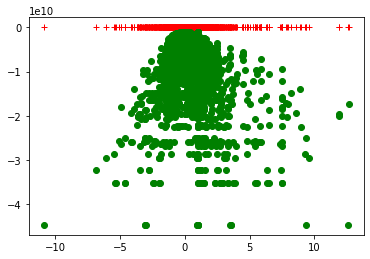

In [163]:
plt.figure()
#plt.plot(X_train,y_train ,'bo' , label="original data no quad")
plt.plot(X_quad_train,y_train,'r+' ) #quad features vs true label
plt.plot(X_quad_train,pr.predict(X_quad_train),'go') #quad features vs predictions

In [164]:
pr.w_

array([-5.04881875e+08, -5.04881875e+08, -1.65817730e+08, -1.07167051e+08,
       -1.85400241e+08,  2.01242943e+06, -1.07471687e+09, -5.86939905e+08,
       -6.41748427e+08,  8.29245596e+08, -6.52474429e+08, -5.96926322e+08,
        5.11326248e+08, -8.58937773e+08,  4.88644412e+08, -1.14345665e+09])

In [165]:
mean_squared_error(y_train,pr.predict(X_quad_train)) #for training

9.005116124731094e+19

## testing

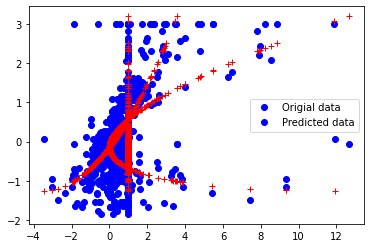

In [117]:
plt.plot(X_quad_train,y_train,'bo' )
plt.legend(['Origial data','Predicted data'])
y_pred_train_quad = pr.predict(X_quad_train)
plt.plot(X_quad_train, y_pred_train_quad ,'r+')


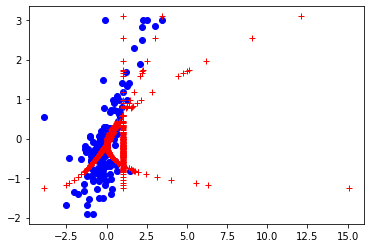

In [109]:
xtest_quad = quadratic.fit_transform(X_test) #pick test x and make quad out ofit
ytest_pred = pr.predict(xtest_quad) #pred ion test quad x
plt.plot(X_test,y_test,'bo')
plt.plot(xtest_quad,ytest_pred,'r+')

In [126]:
mean_squared_error(y_test,ytest_pred)

0.38959282523778827

Transforming the dataset:

In [ ]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

<br>
<br>